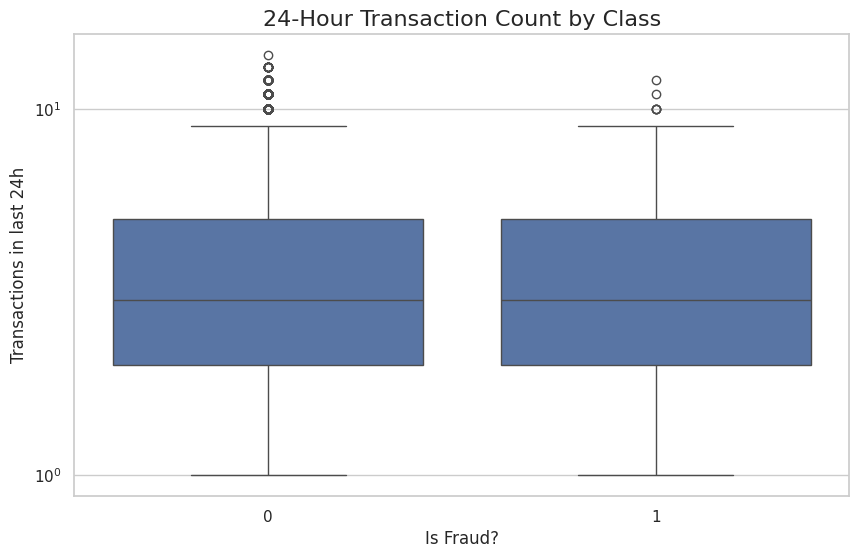

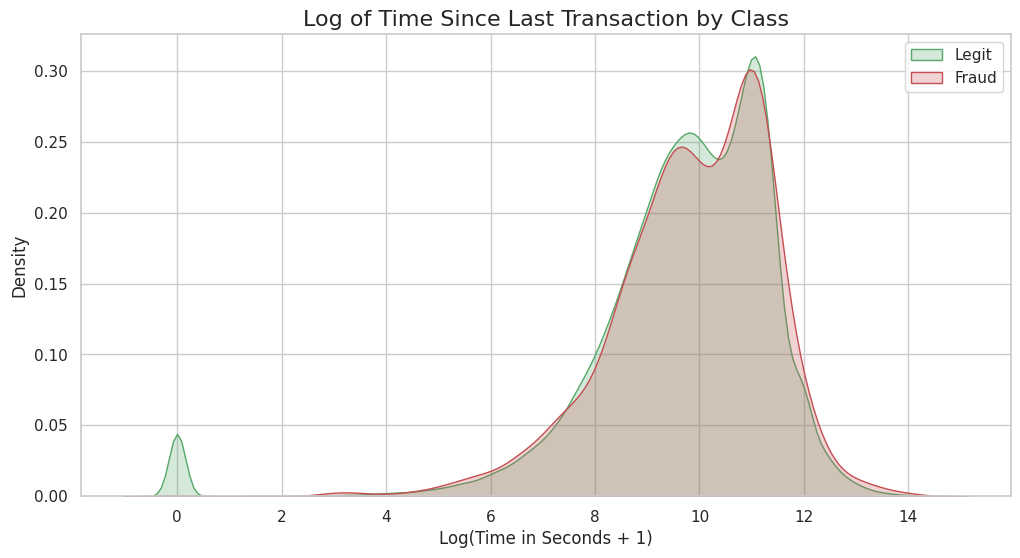

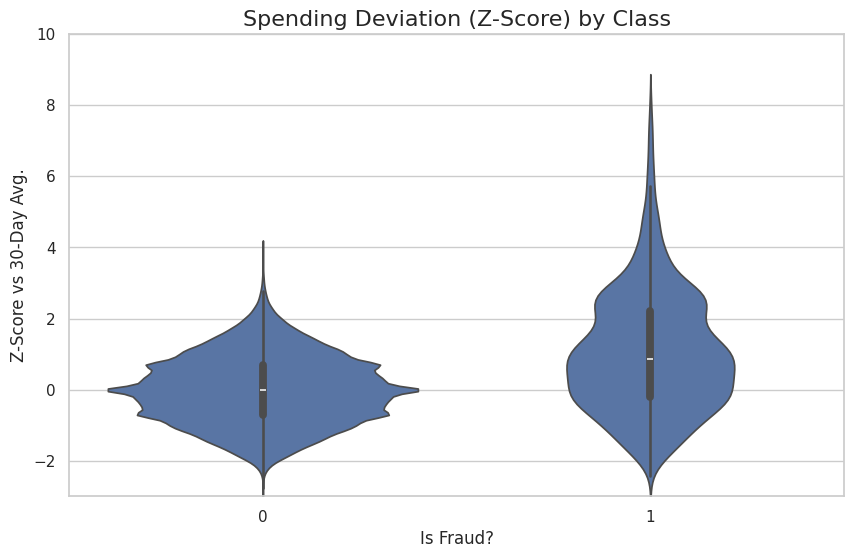

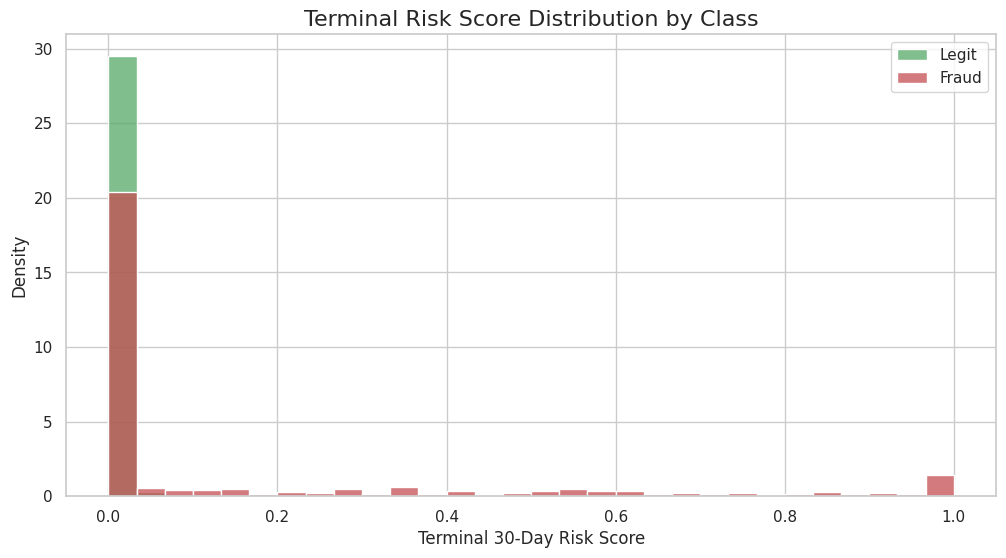

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load created feature store
FEATURE_STORE_PATH = '../data/feature_store.parquet'
df = pd.read_parquet(FEATURE_STORE_PATH)

# Set plot style
sns.set_theme(style="whitegrid")

# --- 1. Visualize Transaction Velocity (CUSTOMER_ID_NB_TX_24H) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='TX_FRAUD', y='CUSTOMER_ID_NB_TX_24H', data=df)
plt.title('24-Hour Transaction Count by Class', fontsize=16)
plt.xlabel('Is Fraud?', fontsize=12)
plt.ylabel('Transactions in last 24h', fontsize=12)
plt.yscale('log') # Use log scale as counts can be skewed
plt.show()

# --- 2. Visualize Behavioral Timing (CUSTOMER_ID_TIME_SINCE_LAST_TX) ---
plt.figure(figsize=(12, 6))
# We use a log scale because the time differences can be very small for fraud
# Add 1 to avoid log(0) errors
sns.kdeplot(np.log1p(df[df['TX_FRAUD']==0]['CUSTOMER_ID_TIME_SINCE_LAST_TX']), label='Legit', fill=True, color='g')
sns.kdeplot(np.log1p(df[df['TX_FRAUD']==1]['CUSTOMER_ID_TIME_SINCE_LAST_TX']), label='Fraud', fill=True, color='r')
plt.title('Log of Time Since Last Transaction by Class', fontsize=16)
plt.xlabel('Log(Time in Seconds + 1)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

# --- 3. Visualize Spending Deviation (CUSTOMER_ID_AMOUNT_ZSCORE_30D) ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='TX_FRAUD', y='CUSTOMER_ID_AMOUNT_ZSCORE_30D', data=df)
plt.title('Spending Deviation (Z-Score) by Class', fontsize=16)
plt.xlabel('Is Fraud?', fontsize=12)
plt.ylabel('Z-Score vs 30-Day Avg.', fontsize=12)
# We can limit the y-axis to see the bulk of the distribution more clearly
plt.ylim(-3, 10)
plt.show()

# --- 4. Visualize Terminal Risk (TERMINAL_ID_RISK_30D) ---
plt.figure(figsize=(12, 6))
sns.histplot(df[df['TX_FRAUD']==0]['TERMINAL_ID_RISK_30D'], color="g", label='Legit', stat='density', bins=30)
sns.histplot(df[df['TX_FRAUD']==1]['TERMINAL_ID_RISK_30D'], color="r", label='Fraud', stat='density', bins=30)
plt.title('Terminal Risk Score Distribution by Class', fontsize=16)
plt.xlabel('Terminal 30-Day Risk Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()